In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'/home/vaibhav/Downloads/Project_CNN/cats_and_dogs_small/train'
test_dir = r'/home/vaibhav/Downloads/Project_CNN/cats_and_dogs_small/test'
valid_dir = r'/home/vaibhav/Downloads/Project_CNN/cats_and_dogs_small/validation'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data_ = ImageDataGenerator(rescale=1.0/255.0)
test_data_ = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
train_data = train_data_.flow_from_directory(train_dir,
                                             target_size=(160,160),
                                             class_mode='binary',
                                             batch_size=20)

valid_data = test_data_.flow_from_directory(valid_dir,
                                           target_size=(160,160),
                                           class_mode='binary',
                                           batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = keras.models.Sequential()

In [9]:
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=[160,160,3]))

In [10]:
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)      

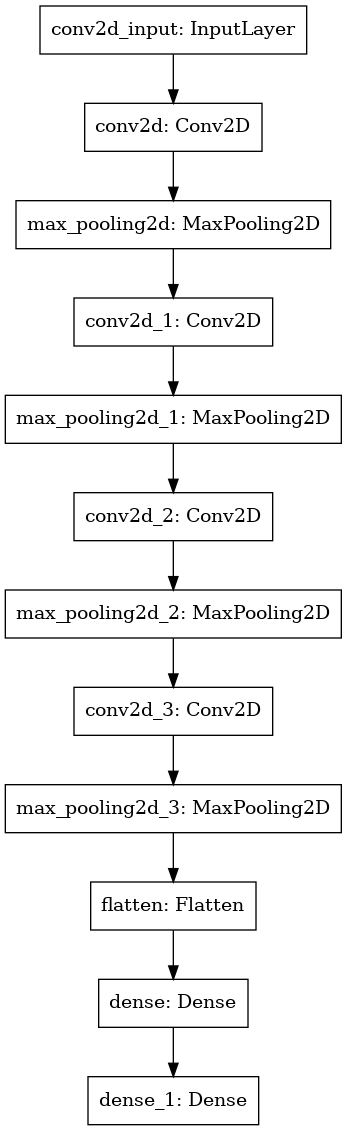

In [12]:
keras.utils.plot_model(model)

In [63]:
model.compile(keras.optimizers.RMSprop(lr=0.0001),"binary_crossentropy",["accuracy"])

In [64]:
model_his = model.fit_generator(train_data,
                               steps_per_epoch=100,
                               epochs=20,
                               validation_data=valid_data,
                               validation_steps=50)

Epoch 1/20
100/100 [==============================] - 35s 342ms/step - loss: 0.6952 - accuracy: 0.5047 - val_loss: 0.6768 - val_accuracy: 0.5110
Epoch 2/20
100/100 [==============================] - 34s 340ms/step - loss: 0.6540 - accuracy: 0.6255 - val_loss: 0.6263 - val_accuracy: 0.6480
Epoch 3/20
100/100 [==============================] - 34s 343ms/step - loss: 0.5811 - accuracy: 0.7029 - val_loss: 0.5967 - val_accuracy: 0.6740
Epoch 4/20
100/100 [==============================] - 34s 345ms/step - loss: 0.5578 - accuracy: 0.7135 - val_loss: 0.6583 - val_accuracy: 0.6320
Epoch 5/20
100/100 [==============================] - 35s 345ms/step - loss: 0.5317 - accuracy: 0.7452 - val_loss: 0.5864 - val_accuracy: 0.6800
Epoch 6/20
100/100 [==============================] - 35s 348ms/step - loss: 0.4742 - accuracy: 0.7844 - val_loss: 0.6347 - val_accuracy: 0.6640
Epoch 7/20
100/100 [==============================] - 34s 342ms/step - loss: 0.4677 - accuracy: 0.7845 - val_loss: 0.5677 - val_ac

<AxesSubplot:>

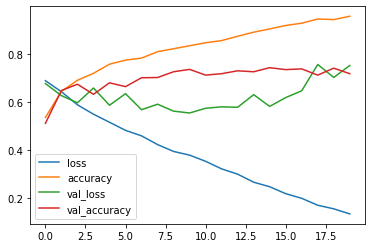

In [65]:
pd.DataFrame(model_his.history).plot()

In [66]:
model.save("model_cat_dog.h5")

In [67]:
del model
keras.backend.clear_session()

# Dealing with overfitting

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
train_dir = r'/home/vaibhav/Downloads/Project_CNN/cats_and_dogs_small/train'
test_dir = r'/home/vaibhav/Downloads/Project_CNN/cats_and_dogs_small/test'
valid_dir = r'/home/vaibhav/Downloads/Project_CNN/cats_and_dogs_small/validation'

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_data_ = ImageDataGenerator(rescale=1.0/255.0,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_data_ = ImageDataGenerator(rescale=1.0/255.0)

In [14]:
train_data = train_data_.flow_from_directory(train_dir,
                                             target_size=(160,160),
                                             class_mode='binary',
                                             batch_size=20)

valid_data = test_data_.flow_from_directory(valid_dir,
                                           target_size=(160,160),
                                           class_mode='binary',
                                           batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [75]:
model = keras.models.Sequential()

In [76]:
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=[160,160,3]))

In [77]:
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [79]:
model.compile(keras.optimizers.RMSprop(lr=0.0001),"binary_crossentropy",["accuracy"])

In [80]:
model_his = model.fit_generator(train_data,
                               steps_per_epoch=100,
                               epochs=40,
                               validation_data=valid_data,
                               validation_steps=50)

Epoch 1/20
100/100 [==============================] - 36s 349ms/step - loss: 0.6972 - accuracy: 0.5096 - val_loss: 0.6813 - val_accuracy: 0.5490
Epoch 2/20
100/100 [==============================] - 34s 341ms/step - loss: 0.6814 - accuracy: 0.5674 - val_loss: 0.6617 - val_accuracy: 0.5980
Epoch 3/20
100/100 [==============================] - 33s 330ms/step - loss: 0.6720 - accuracy: 0.5856 - val_loss: 0.6528 - val_accuracy: 0.5990
Epoch 4/20
100/100 [==============================] - 33s 328ms/step - loss: 0.6568 - accuracy: 0.5949 - val_loss: 0.6307 - val_accuracy: 0.6480
Epoch 5/20
100/100 [==============================] - 32s 324ms/step - loss: 0.6341 - accuracy: 0.6378 - val_loss: 0.6057 - val_accuracy: 0.6620
Epoch 6/20
100/100 [==============================] - 33s 332ms/step - loss: 0.6236 - accuracy: 0.6580 - val_loss: 0.5889 - val_accuracy: 0.6670
Epoch 7/20
100/100 [==============================] - 34s 334ms/step - loss: 0.6048 - accuracy: 0.6570 - val_loss: 0.5645 - val_ac

In [81]:
model_his = model.fit_generator(train_data,
                               steps_per_epoch=100,
                               epochs=20,
                               validation_data=valid_data,
                               validation_steps=50)

Epoch 1/20
100/100 [==============================] - 37s 374ms/step - loss: 0.5258 - accuracy: 0.7455 - val_loss: 0.4939 - val_accuracy: 0.7550
Epoch 2/20
100/100 [==============================] - 38s 380ms/step - loss: 0.5204 - accuracy: 0.7330 - val_loss: 0.4845 - val_accuracy: 0.7650
Epoch 3/20
100/100 [==============================] - 36s 362ms/step - loss: 0.5185 - accuracy: 0.7485 - val_loss: 0.5711 - val_accuracy: 0.7060
Epoch 4/20
100/100 [==============================] - 38s 381ms/step - loss: 0.5157 - accuracy: 0.7505 - val_loss: 0.5542 - val_accuracy: 0.7130
Epoch 5/20
100/100 [==============================] - 38s 376ms/step - loss: 0.5073 - accuracy: 0.7520 - val_loss: 0.5053 - val_accuracy: 0.7440
Epoch 6/20
100/100 [==============================] - 38s 376ms/step - loss: 0.4976 - accuracy: 0.7665 - val_loss: 0.4677 - val_accuracy: 0.7700
Epoch 7/20
100/100 [==============================] - 38s 378ms/step - loss: 0.5197 - accuracy: 0.7505 - val_loss: 0.4986 - val_ac

In [82]:
model_his = model.fit_generator(train_data,
                               steps_per_epoch=100,
                               epochs=20,
                               validation_data=valid_data,
                               validation_steps=50)

Epoch 1/20
100/100 [==============================] - 38s 377ms/step - loss: 0.4652 - accuracy: 0.7780 - val_loss: 0.5793 - val_accuracy: 0.7340
Epoch 2/20
100/100 [==============================] - 38s 376ms/step - loss: 0.4509 - accuracy: 0.7785 - val_loss: 0.4571 - val_accuracy: 0.7860
Epoch 3/20
100/100 [==============================] - 37s 371ms/step - loss: 0.4576 - accuracy: 0.7785 - val_loss: 0.5192 - val_accuracy: 0.7480
Epoch 4/20
100/100 [==============================] - 38s 383ms/step - loss: 0.4434 - accuracy: 0.7960 - val_loss: 0.4592 - val_accuracy: 0.7700
Epoch 5/20
100/100 [==============================] - 37s 366ms/step - loss: 0.4384 - accuracy: 0.7900 - val_loss: 0.4504 - val_accuracy: 0.7780
Epoch 6/20
100/100 [==============================] - 37s 370ms/step - loss: 0.4522 - accuracy: 0.7880 - val_loss: 0.4476 - val_accuracy: 0.7820
Epoch 7/20
100/100 [==============================] - 38s 377ms/step - loss: 0.4409 - accuracy: 0.7985 - val_loss: 0.5278 - val_ac

In [15]:
model_his = model.fit_generator(train_data,
                               steps_per_epoch=100,
                               epochs=20,
                               validation_data=valid_data,
                               validation_steps=50)

Epoch 1/20
100/100 [==============================] - 33s 334ms/step - loss: 0.4140 - accuracy: 0.8110 - val_loss: 0.4499 - val_accuracy: 0.8000
Epoch 2/20
100/100 [==============================] - 33s 325ms/step - loss: 0.4214 - accuracy: 0.8095 - val_loss: 0.4070 - val_accuracy: 0.8180
Epoch 3/20
100/100 [==============================] - 33s 327ms/step - loss: 0.3999 - accuracy: 0.8205 - val_loss: 0.5505 - val_accuracy: 0.7650
Epoch 4/20
100/100 [==============================] - 33s 332ms/step - loss: 0.4012 - accuracy: 0.8125 - val_loss: 0.4106 - val_accuracy: 0.8130
Epoch 5/20
100/100 [==============================] - 35s 346ms/step - loss: 0.3811 - accuracy: 0.8260 - val_loss: 0.5281 - val_accuracy: 0.7470
Epoch 6/20
100/100 [==============================] - 34s 335ms/step - loss: 0.3983 - accuracy: 0.8185 - val_loss: 0.4579 - val_accuracy: 0.7840
Epoch 7/20
100/100 [==============================] - 33s 332ms/step - loss: 0.3951 - accuracy: 0.8170 - val_loss: 0.4489 - val_ac

In [23]:
test_data = test_data_.flow_from_directory(test_dir,target_size=(160,160),class_mode="binary",batch_size=20)

Found 1000 images belonging to 2 classes.


In [24]:
    model.evaluate_generator(test_data,steps=50,)

[0.42417091131210327, 0.828000009059906]